In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [187]:
img = cv2.imread("/home/damvantai/Documents/projects/BBox-Label-Tool/Images/003/1065_rotated.jpg")

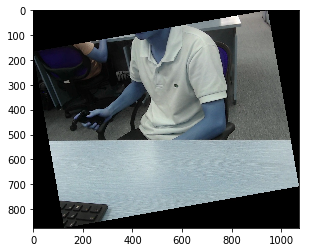

In [188]:
plt.imshow(img)

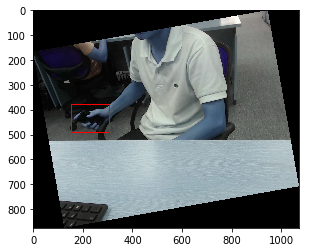

In [189]:
img_oxford = cv2.rectangle(img, (153,379),(307,492), (255, 0, 0), 3)
plt.imshow(img_oxford)

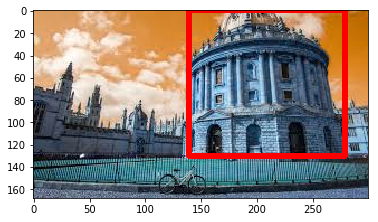

In [5]:
# 20, 0), (160, 130
img_flip = cv2.flip(img, 1)
plt.imshow(img_flip)

In [6]:
img_flip.shape

(168, 300, 3)

In [7]:
height, width = img_flip.shape[0:2]

In [8]:
height

168

In [9]:
width

300

In [10]:
x1, y1 = 20, 0
x2, y2 = 160, 130

In [11]:
x11 = width - x1
x22 = width - x2
y11 = y1
y22 = y2

In [12]:
x_top_left = x22
x_right_bottom = x11
y_top_left = y11
y_right_bottom = y22

In [13]:
img_flip_rect = cv2.rectangle(img_flip, (x_top_left, y_top_left), (x_right_bottom, y_right_bottom), (255, 0, 0), 3)

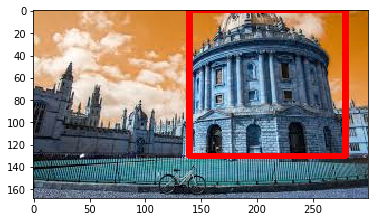

In [14]:
plt.imshow(img_flip_rect)

In [ ]:
cv2.imwrite()

## Flip boxing in image folder 002

In [52]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [53]:
height = 720
width = 960

In [54]:
path = "/home/damvantai/Documents/projects/BBox-Label-Tool/"
path_image = path + "Images/003/"
path_label = path + "Labels/003/"

In [55]:
# Create flip image
for path in os.listdir(path_image):
    img = cv2.imread(path_image + path)
    img_flip = cv2.flip(img, 1)
    path_img_flip = path_image + path.replace(".jpg", "") + "_flip.jpg"
    cv2.imwrite(path_img_flip, img_flip)

In [151]:
text_file = open("row_video_iphone_damvantai_flip_198.txt", "w")
row = ""

In [152]:
# Create file row full text
for path in os.listdir(path_label):
    
    box_str = ""
    box_str_flip = ""
    with open(path_label + path) as filetext_box:
        data = filetext_box.readlines()
        
        # Del "\n"
        line = [x.strip() for x in data]
        
        # Delete image and text no hand
        if line[0] == '0':
            os.remove(path_label + path)
            os.remove(path_image + path.replace("txt", "jpg"))
            os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
            continue

        for i in range(1, len(line)):
            line_split = line[i].split(" ")
            
            box_str += " " + line_split[0] + "," + \
            line_split[1] + "," + line_split[2] + "," + line_split[3] + " " + str(0)
            
            x11 = width - int(line_split[0])
            x22 = width - int(line_split[2])
            y11 = int(line_split[1])
            y22 = int(line_split[3])
            
            x_top_left = x22
            x_right_bottom = x11
            y_top_left = y11
            y_right_bottom = y22
            box_str_flip += " " + str(x_top_left) + "," + \
            str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + " " + str(0)
            
    row += path_image + path.replace(".txt", ".jpg") + box_str + '\n' + \
    path_image + path.replace(".txt", "") + "_flip.jpg" + box_str_flip + "\n"
text_file.write(row)
text_file.close()

## Completed

## Augmentation image rotate with boxes

In [134]:
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
import math
import numpy as np

In [135]:
img = cv2.imread("../data/oxford.jpg")

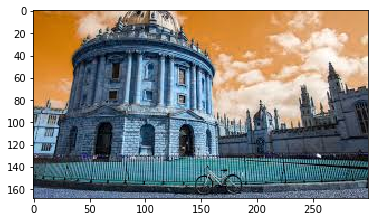

In [136]:
plt.imshow(img)

In [137]:
img_detect = cv2.rectangle(img, (25, 0), (160, 140), (255, 0, 0), 3)

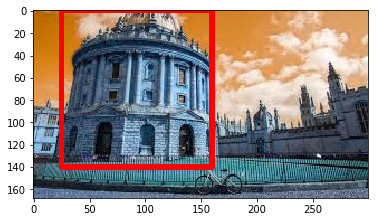

In [138]:
plt.imshow(img_detect)

In [89]:
angle = np.random.randint(20, size=1)[0]

In [90]:
angle

4

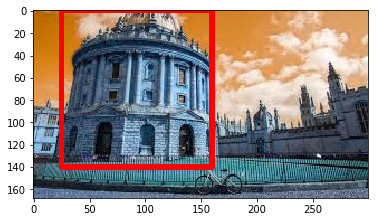

In [139]:
rotated = ndimage.rotate(img, -0)
plt.imshow(rotated)

In [120]:
# xy, xy1, xy2, xy3 = top left, top right, bottom left, bottom right
top_left = [25, 0]
bottom_right = [160, 140]

top_right = [bottom_right[0], top_left[1]]
bottom_left = [top_left[0], bottom_right[1]]

In [125]:
top_right

[160, 0]

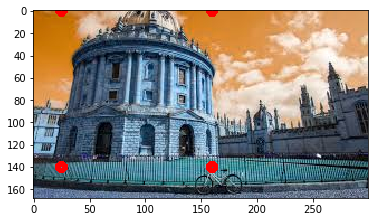

In [124]:
img_point = cv2.circle(img, (top_right[0], top_right[1]), 3, (255, 0, 0), 3)
img_point = cv2.circle(img, (bottom_left[0], bottom_left[1]), 3, (255, 0, 0), 3)
img_point = cv2.circle(img, (top_left[0], top_left[1]), 3, (255, 0, 0), 3)
img_point = cv2.circle(img, (bottom_right[0], bottom_right[1]), 3, (255, 0, 0), 3)
plt.imshow(img_point)

In [130]:
img_rotate, (x1, y1), (x2, y2), (x3, y3), (x4, y4) = rot(img, top_left, top_right, bottom_right, bottom_left, -20)

In [132]:
x1 = int(x1)
x2 = int(x2)
x3 = int(x3)
x4 = int(x4)
y1 = int(y1)
y2 = int(y2)
y3 = int(y3)
y4 = int(y4)

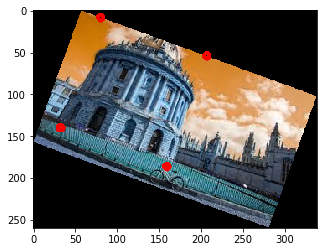

In [140]:
img_point = cv2.circle(img_rotate, (x1, y1), 3, (255, 0, 0), 3)
img_point = cv2.circle(img_rotate, (x2, y2), 3, (255, 0, 0), 3)
img_point = cv2.circle(img_rotate, (x3, y3), 3, (255, 0, 0), 3)
img_point = cv2.circle(img_rotate, (x4, y4), 3, (255, 0, 0), 3)
plt.imshow(img_point)

In [145]:
left = min([x1, x2, x3, x4])
top = min([y1, y2, y3, y4])
right = max([x1, x2, x3, x4])
bottom = max([y1, y2, y3, y4])

In [146]:
print(left)
print(top)
print(right)
print(bottom)

32
8
207
186


In [129]:
def rot(image, xy, xy1, xy2, xy3, angle):
    im_rot = ndimage.rotate(image, angle)
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    org = xy - org_center
    org1 = xy1 - org_center
    org2 = xy2 - org_center
    org3 = xy3 - org_center
    a = np.deg2rad(angle)
#     new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
#             -org[0]*np.sin(a) + org[1]*np.cos(a) ])
#     new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
#             -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
            -org[0]*np.sin(a) + org[1]*np.cos(a) ])
    
    new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
            -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    
    new2 = np.array([org2[0]*np.cos(a) + org2[1]*np.sin(a),
            -org2[0]*np.sin(a) + org2[1]*np.cos(a) ])
    
    new3 = np.array([org3[0]*np.cos(a) + org3[1]*np.sin(a),
            -org3[0]*np.sin(a) + org3[1]*np.cos(a) ])
    return im_rot, new + rot_center, new1 + rot_center, new2 + rot_center, new3 + rot_center

In [116]:
img_rotate, (x1, y1), (x2, y2), (x3, y3), (x4, y4) = rot(img, np.array([25, 0]), np.array([160, 140]), -20)

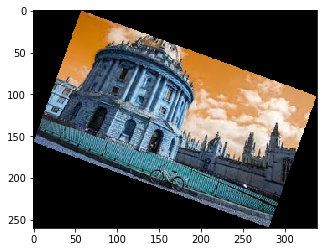

In [117]:
plt.imshow(img_rotate)

In [118]:
# (25, 0), (160, 140)

x1 = int(x1)
y1 = int(y1)
x2 = 


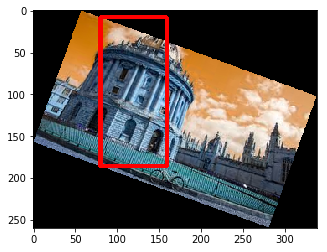

In [119]:
img_rotate = cv2.rectangle(img_rotate, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.imshow(img_rotate)

## Tested

In [148]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import ndimage

In [161]:
def rot(image, xy, xy1, xy2, xy3, angle):
    im_rot = ndimage.rotate(image, angle)
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    org = xy - org_center
    org1 = xy1 - org_center
    org2 = xy2 - org_center
    org3 = xy3 - org_center
    a = np.deg2rad(angle)
#     new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
#             -org[0]*np.sin(a) + org[1]*np.cos(a) ])
#     new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
#             -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
            -org[0]*np.sin(a) + org[1]*np.cos(a) ])
    
    new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
            -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    
    new2 = np.array([org2[0]*np.cos(a) + org2[1]*np.sin(a),
            -org2[0]*np.sin(a) + org2[1]*np.cos(a) ])
    
    new3 = np.array([org3[0]*np.cos(a) + org3[1]*np.sin(a),
            -org3[0]*np.sin(a) + org3[1]*np.cos(a) ])
    return new + rot_center, new1 + rot_center, new2 + rot_center, new3 + rot_center

In [181]:
text_file = open("row_video_iphone_damvantai_rorate_198.txt", "w")
row = ""

In [182]:
# Create file row full text
for path in os.listdir(path_label):
    
    box_str = ""
    with open(path_label + path) as filetext_box:
        data = filetext_box.readlines()
        
        # Del "\n"
        line = [x.strip() for x in data]
        
#         # Delete image and text no hand
#         if line[0] == '0':
#             os.remove(path_label + path)
#             os.remove(path_image + path.replace("txt", "jpg"))
#             os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
#             continue

        # Save image rotated
        img = cv2.imread(path_image + path.replace(".txt", ".jpg"))
        path_img_rotated = path_image + path.replace(".txt", "") + "_rotated.jpg"
        angle = np.random.randint(20, size=1)[0]
        img_rotated = ndimage.rotate(img, angle)
        cv2.imwrite(path_img_rotated, img_rotated)
    
        # Number hand in a picture
        for i in range(1, len(line)):
            line_split = line[i].split(" ")
            
#             box_str += " " + line_split[0] + "," + \
#             line_split[1] + "," + line_split[2] + "," + line_split[3] + " " + str(0)

            # xy, xy1, xy2, xy3 = top left, top right, bottom left, bottom right
            top_left = [int(line_split[0]), int(line_split[1])]
            bottom_right = [int(line_split[2]), int(line_split[3])]

            top_right = [bottom_right[0], top_left[1]]
            bottom_left = [top_left[0], bottom_right[1]]
            
            
            (x1, y1), (x2, y2), (x3, y3), (x4, y4) = rot(img, top_left, top_right, bottom_right, bottom_left, angle)
            
            x_top_left = min([x1, x2, x3, x4])
            y_top_left = min([y1, y2, y3, y4])
            x_right_bottom = max([x1, x2, x3, x4])
            y_right_bottom = max([y1, y2, y3, y4])
            
            x_top_left = int(x_top_left)
            y_top_left = int(y_top_left)
            x_right_bottom = int(x_right_bottom)
            y_right_bottom = int(y_right_bottom)
            
            
            
            box_str += " " + str(x_top_left) + "," + \
            str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + " " + str(0)
            
    row += path_image + path.replace(".txt", "") + "_rotated.jpg" + box_str + "\n"
text_file.write(row)
text_file.close()